# Credit Card Default Prediction
This notebook explores and cleans the dataset, performs feature engineering, and prepares data for modeling.


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


os.getcwd()

'c:\\Users\\benla\\Desktop\\credit_card_default_analysis\\notebooks'

In [ ]:
# set the directory
os.chdir(r"C:\Users\benla\Desktop\credit_card_default_analysis")
df = pd.read_excel("data/raw/credit_data.xls", engine="xlrd", header = 1)

# get a sense of what the data is looking like
# print(df.head())
# print(df.tail())
# print(df.shape)
# print(df.columns)
print(df.info()) # make sure that all the string variables are turned into dummies before we run them into correlation matrices
print(df.describe()) # see the mean, sum, std and other info about the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# # now we go and see if there are any missing values
# df.isnull().sum()
# df[df.isnull().any(axis=1)] # returns rows with at least one NAN

# df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


The next step is to perform EDA on the data

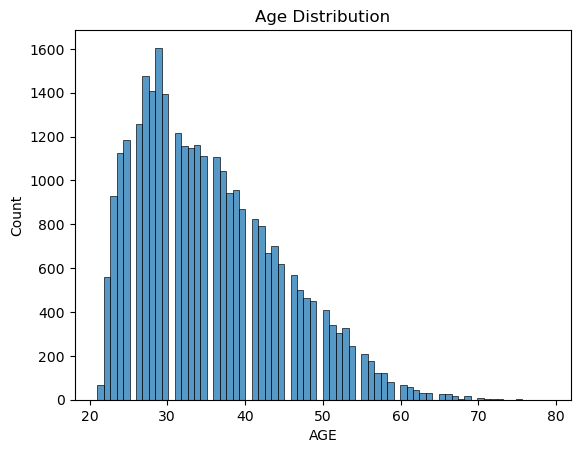

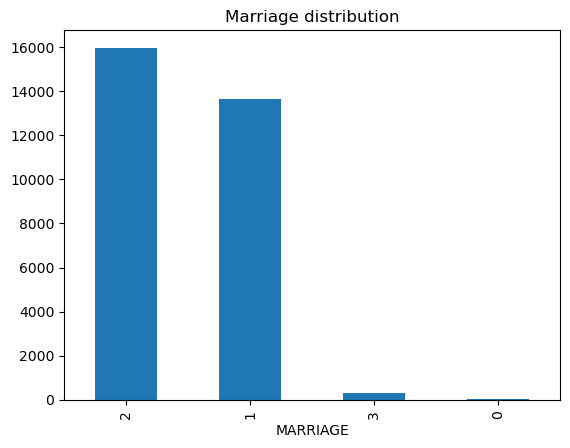

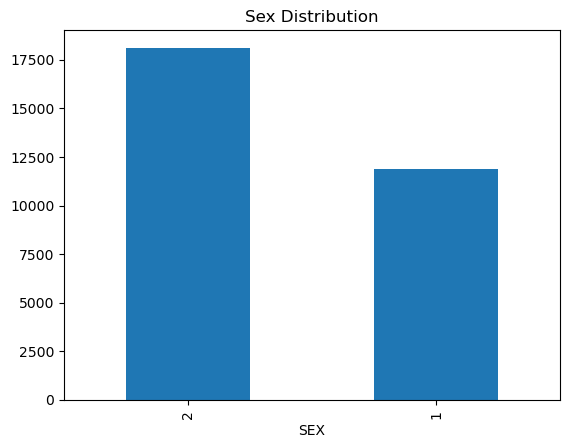

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot a histogram of the age distribution
sns.histplot(df["AGE"])
plt.title("Age Distribution")
plt.show()

df['MARRIAGE'].value_counts().plot(kind='bar')
plt.title("Marriage distribution")
plt.show()

# see the sex distribution
df["SEX"].value_counts().plot(kind="bar")
plt.title("Sex Distribution")
plt.show()

<Axes: >

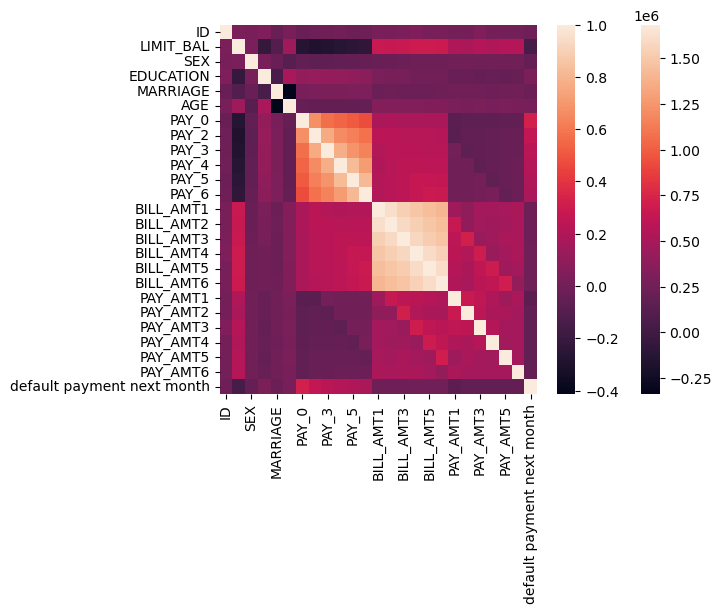

In [ ]:
# now see if there is any correlation between the features of the df
corr_matrix = df.corr()
strong_corr_matrix = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]
strong_corr_matrix

# now to see if there is any clear and strong correlation between the features and the labels
last_col = corr_matrix.iloc[-1]
last_col

sns.heatmap(df)
sns.heatmap(corr_matrix) # some of these are still not dummies 

After EDA is performed and we see that there is no simple correlation between the variables, we will now proceed to building predictive models